<a href="https://colab.research.google.com/github/sebadomic/mlproject_test/blob/main/Deep-Learning_DNNs_Keras_worksheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<figure>
<center>
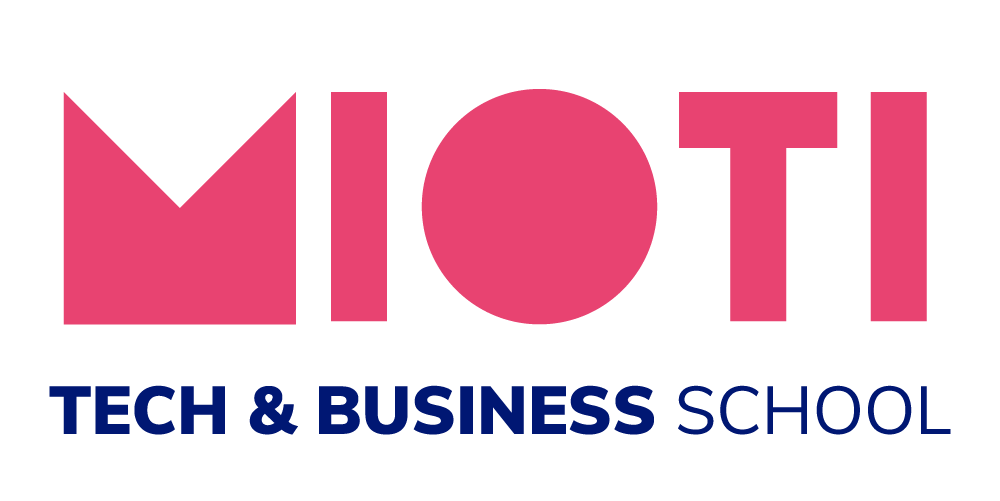
<figcaption></figcaption></center>
</figure>

## <center style="color:#888">Módulo Data Science in IoT<br/>Asignatura: Deep Learning</center>

# Worksheet S4: Redes Neuronales Profundas en Keras (DNNs)

## Objetivos 

El objetivo de este worksheet es continuar comprendiendo las particularidades de las redes neuronales profundas (DNNs) mediante su implementación en Keras.

## Keras

Antes de meternos en el tema con profundidad vamos a echar un vistazo a keras.

La documentación oficial, con el funcionamiento del código pormenorizado así como una buena batería de ejemplos podemos encontrarla aquí: https://keras.io/

Keras es una API de redes neuronales de alto nivel, escrita en Python y puede utilizar como motor de entrenamiento TensorFlow, CNTK o Theano. Desde finales de 2019 keras está integrado de forma nativa en TensorFlow facilitando su uso y mejorando su soporte. Entre otras ventajas, keras destaca por:

- Prototipado fácil y rápido, ya que es una librería sencilla, intuitiva y modular.
- Soporta redes convolucionales y recurrentes, así como la combinación de ambas.
- Puede correr tanto en CPU como en GPU
- Nos evita tener que construir una red neuronal desde 0 y nos abstrae de la complejidad matemática subyacente.

Vamos a por nuestra primera red en keras!


## Refrescamos las DNNs

Como sabemos, las redes son una combinación de operaciones matemáticas simples y funciones de activación. Una red neuronal está formada por una secuencia de capas por las que van pasando nuestros datos. Estas capas están formadas por neuronas. En las redes DNN, dense o perceptrón multicapa (distintas nomenclaturas) cada neurona recibe como entrada todas las neuronas de la capa anterior y está conectada con todas las neuronas de la capa posterior.

La notación matemática de una neurona es la siguiente:

> $Y =(\sum_{i=0}^n w_i x_i) + b$

> $w$ representa los pesos de cada conexión con la neurona 

> $x$ representa el valor de las neuronas de la capa anterior

> $b$ es una constante, representa el bias 

> $n$ es el número de conexiónes

> $Y$ es la salida de la neurona

Esa ecuación no está aún completa, se nos olvida una parte crucial, la **función de activación**. Esta función es la que la neurona aplica a los datos y permite que la red realice transformaciones no lineales. La función completa sería la siguiente:

$Y =F((\sum_{i=0}^n w_i x_i) + b)$

### Representación de una DNN completa



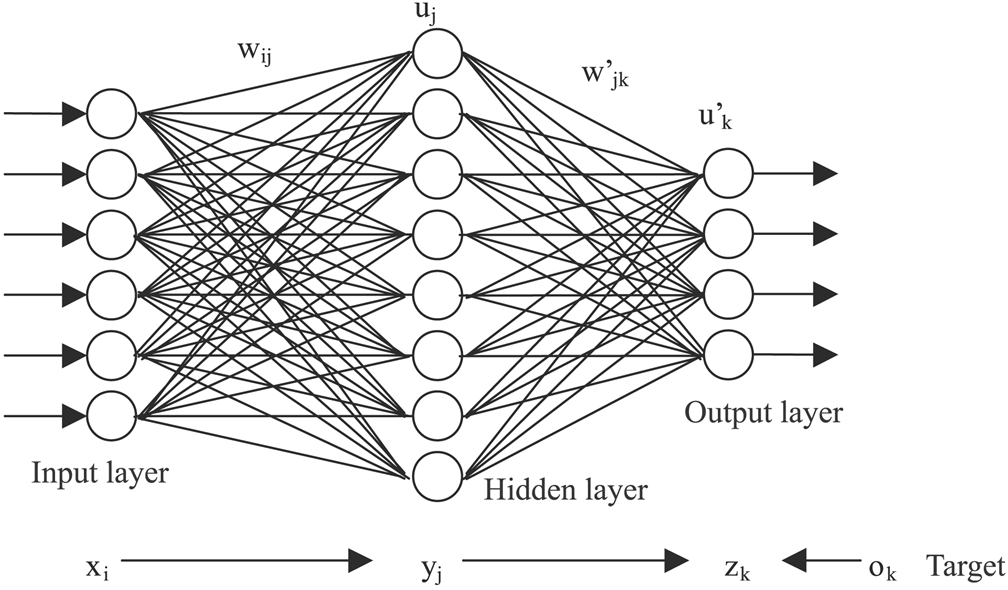



#### Datos

Como sabemos, nuestros datos entran diréctamente (aunque a veces realizamos normalizaciones previamente) a la red neuronal. En el caso de DNNs como las que estamos viendo hasta ahora, la entrada debe ser un único vector de tipo numérico por cada muestra.

#### Capas

Las redes tiene 3 tipos de capas:

- Capa de entrada: Es la capa que recibe nuestros datos tal cual se los pasamos.
- Capa/s oculta/s: Estas capas realizan la transformación no lineal de nuestros datos. Suelen compartir la función de activación. En el caso de redes DNN, cada neurona de una capa está conectada a todas las neuronas de la capa posterior.
- Capa de salida: Es la capa donde podemos ver el resultado que saca la red.

#### Pesos

Cada una de las conexiones de una neurona con otra es una conexión con un peso, es decir con una fuerza asociada a esta conexión. El dato que saca una neurona es multiplicado por este peso antes de llegar a la neurona a la que está conectado.

#### Funciones de activación

La función de activación es la función que cada neurona aplica a la suma total de sus entradas antes de llevarla a la salida. Normalmente son funciones no lineales, lo que nos permite añadir complejidad al modelo consiguiendo hacer mejores predicciones.

Las funciones de activación más típicas son las siguientes:



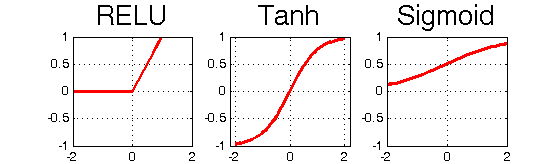


En la capa de salida, suele utilizarse una función lineal en el caso de regresión o una capa softmax en el caso de clasificación. Recordemos que la capa softmax fuerza a que todas las neuronas tengan un valor entre 0 y 1 sumen en total 1, de forma que podemos considerar las salidas de esta capa probabilidades.


## Configurando el entorno

Como siempre, comenzamos importando los módulos y librerías que vamos a necesitar para nuestra implementación.

Importamos numpy y fijamos una semilla para que las inicializaciones aleatorias sean igual aunque lo ejecutemos varias veces. De esta forma, los experimentos siempre llevan a los mismos resultados y podemos reproducirlos y encontrar fallos más fácilmente.

In [1]:
#%tensorflow_version 2.x  # sólo necesaria si estamos en colab
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Otras librerías
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importamos las capas y modelos que vamos a necesitar para este worksheet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten

### Datos

En este ejemplo vamos a utilizar el Fashion MNIST Dataset. Este dataset está incluido en keras, facilitando su carga y uso.

Fashion MNIST contiene 60.000 imagenes para entrenar y 10.000 imagenes para test

In [3]:
# Import Fashion MNIST data
fashion_mnist = keras.datasets.fashion_mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = fashion_mnist

4422102/4422102 [==============================] - 1s 0us/step


Vamos a echar un vistazo a esos datos

In [4]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


Para tener un conjunto separado de validación, vamos a separar 10000 imágenes de train (las primeras, por ejemplo) para validación, con lo que nuestros conjuntos quedarán separados en train, validación y test.

Podemos comprobar también que nuestro conjunto de validación tiene ejemplos de todas las clases y aproximadamente balanceados por clase para evitar que el porcentaje de aciertos esté sesgado.

In [5]:
# Primeras 10000 imágenes, las utilizamos como validación
X_valid = train_images[:10000]
Y_valid = train_labels[:10000]

# Comprobación de selección de datos de validación
print(Y_valid.min(), Y_valid.max())
for i in range(10):
    print('Examples class = ' + str(i) + ': ' + str(np.sum(Y_valid==i)))

X_train = train_images[10000:]
Y_train = train_labels[10000:]

X_test = test_images
Y_test = test_labels

print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)


0 9
Examples class = 0: 942
Examples class = 1: 1027
Examples class = 2: 1016
Examples class = 3: 1019
Examples class = 4: 974
Examples class = 5: 989
Examples class = 6: 1021
Examples class = 7: 1022
Examples class = 8: 990
Examples class = 9: 1000
(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


Y ahora, a ver cómo es uno de nuestros píxeles

In [6]:
train_images[0,23,23]

194

Fashion MNIST contiene imágenes de 28x28 en escala de grises, con cada valor entre 0 (totalmente negro) y 255 (totalmente blanco).

### Preprocesando los datos para Keras

En función de las redes que vayamos a utilizar necesitaremos que nuestros datos estén en un formato u otro. Por ejemplo, las redes convolucionales esperan imágenes en tamaño #canales x ancho x alto.

En nuestro caso, vamos a utilizar redes neuronales feed-forward como en la sesión anterior, así que necesitaremos que la entrada sea de una sola dimensión. Para este tipo de transformaciones, utilizaremos la función reshape.

In [7]:
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_valid = X_valid.reshape(X_valid.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

Para confirmar esta transformación, podemos imprimir las dimensiones del conjunto de entrenamiento de nuevo.

In [8]:
print(X_train.shape)

(50000, 784)


Por último, transformaremos los datos de entrada al tipo float32 (paso previo a una posible normalización)

In [9]:
X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')
X_test = X_test.astype('float32')

### Preprocesado de las etiquetas para Keras

A continuación, vamos a ver en qué formato están las etiquetas que recibimos:

In [10]:
print(Y_train.shape)

(50000,)


Como pasaba en la implementación en TensorFlow, esto supone un problema debido a la definición de la función de coste. Deberíamos tener un vector de 10 valores, uno para cada clase. Tal y como lo tenemos ahora, nuestras etiquetas están en un array unidimensional. Vamos a ver los primeros 10 ejemplos para ver qué formato tienen:

In [ ]:
print(Y_train[:10])

[8 7 6 8 7 7 2 0 5 3]


Como podemos ver, nuestras etiquetas son un vector con los valores de las clases de 0 a 9.

Para convertirlas al formato esperado por la red, aunque esta conversión podría resolverse con funciones de numpy pero es engorroso, vamos a utilizar la herramienta to\_categorical que hemos importado al principio que resuelve este problema por nosotros.

In [11]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = keras.utils.to_categorical(Y_train, num_classes=10)
Y_valid = keras.utils.to_categorical(Y_valid, num_classes=10)
Y_test = keras.utils.to_categorical(Y_test, num_classes=10)

Veamos si ya está resuelto:

In [12]:
print(Y_train.shape)
print(Y_train[:10])

(50000, 10)
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


Solucionado!

## DNNs en Keras

### Definiendo el modelo

Ahora que los datos están preparados vamos a crear nuestro modelo. Por suerte, Keras es mucho más sencillo que TensorFlow. Vamos a implementar una red neuronal feed-forward con 2 capas ocultas de tamaño 512 y activación ReLu y una capa softmax al final.

En Keras esto se hace de la siguiente forma:

Primero declaramos un modelo secuencial de la siguiente forma:

In [13]:
model = keras.Sequential()

A continuación, añadimos las capas ocultas feed-forward:

In [14]:
model.add(Dense(512, activation='relu', input_shape=(28*28,)))
model.add(Dense(512, activation='relu'))

Como podeis ver, añadir capas en Keras es muy sencillo, es como si construyésemos nuestro modelo con piezas de Lego. Una de las grandes ventajas de Keras es que nosotros sólo necesitamos especificar la arquitectura que queremos, y Keras maneja de forma automática los tamaños de entrada y salida de cada una de estas capas (salvo la primera, que necesita recibir de manera explícita el tamaño de entrada de nuestros datos mediante el parámetro _input_\__shape_. 

Por último, añadimos la capa de salida de tipo softmax con 10 unidades, una por cada clase.

In [15]:
model.add(Dense(10, activation='softmax'))

### Compilando el modelo

Una vez que hemos definido el modelo, el siguiente paso es compilarlo. Para ello, tenemos que especificar la función de coste que vamos a emplear y el optimizador con el que queremos que se entrene. De forma opcional, podemos añadir también distintas métricas, de forma que al entrenar el modelo nos dé feedback en tiempo de entrenamiento.

En nuestro caso vamos a utilizar lo mismo que en el ejemplo anterior, entropía cruzada como función de coste y el optimizador Adam. Especificaremos la probabilidad de acierto como la métrica que utilizaremos para visualización del rendimiento en tiempo de entrnamiento.

En Keras, esto se especifica de la siguiente forma:

In [16]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Entrenamiento del modelo

Una vez hemos compilado el modelo, tan sólo nos queda un paso más para entrenarlo. Para ello deberemos especificar qué datos se van a utilizar, el tamaño del batch y el número de épocas que vamos a ver los datos en tiempo de entrenamieno.

La opción verbose indica si queremos que el entrenamiento imprima información por pantalla o no.

Podemos añadir además nuestro conjunto de validación, para que nos muestre el rendimiento en dicho conjunto al finalizar cada época.

En Keras la función que entrena el modelo se llama fit:

In [17]:
model.fit(X_train, Y_train, 
          batch_size=128, epochs=10, verbose=1, validation_data=(X_valid, Y_valid))

Epoch 1/10
391/391 [==============================] - 7s 16ms/step - loss: 5.7620 - accuracy: 0.7659 - val_loss: 0.9397 - val_accuracy: 0.8016
Epoch 2/10
391/391 [==============================] - 6s 16ms/step - loss: 0.6850 - accuracy: 0.8214 - val_loss: 0.6443 - val_accuracy: 0.8228
Epoch 3/10
391/391 [==============================] - 6s 16ms/step - loss: 0.5007 - accuracy: 0.8439 - val_loss: 0.5472 - val_accuracy: 0.8334
Epoch 4/10
391/391 [==============================] - 7s 17ms/step - loss: 0.4352 - accuracy: 0.8552 - val_loss: 0.4868 - val_accuracy: 0.8480
Epoch 5/10
391/391 [==============================] - 6s 15ms/step - loss: 0.4180 - accuracy: 0.8586 - val_loss: 0.4900 - val_accuracy: 0.8455
Epoch 6/10
391/391 [==============================] - 6s 17ms/step - loss: 0.4022 - accuracy: 0.8618 - val_loss: 0.4549 - val_accuracy: 0.8547
Epoch 7/10
391/391 [==============================] - 6s 15ms/step - loss: 0.3770 - accuracy: 0.8695 - val_loss: 0.4439 - val_accuracy: 0.8578

Así de fácil!

Hay una serie de funciones que se llaman 'callback' que sirven para añadir un criterio de parada, guardar los pesos del modelo mientras se está entrenando, guardar logs de cada época de entrenamiento y otras cosas que pueden sernos útiles para el entrenamiento (y algunas de las cuales exploraremos en los challenges), pero como hemos visto Keras es muy sencillo de utilizar y potente.

### Evaluacion del modelo

Ya hemos entrenado el modelo, ahora vamos a comprobar su rendimiento evaluándolo sobre los datos de test de la siguiente forma:

In [18]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.48369595408439636, 0.8500000238418579]


La función evaluate devuelve en primer lugar el valor de la función de coste y a continuación cada una de las métricas que han sido añadidas al compilar el modelo, en nuestro caso, el primer valor es la entropía cruzada y el segundo el porcentaje de acierto.

## Resumen final, todo el código en un solo script

In [19]:
#%tensorflow_version 2.x  # sólo necesaria si estamos en colab
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Otras librerías
import numpy as np
import matplotlib.pyplot as plt

# Importamos las capas y modelos que vamos a necesitar para este worksheet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten

# Import Fashion MNIST data
fashion_mnist = keras.datasets.fashion_mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = fashion_mnist

# Primeras 10000 imágenes, las utilizamos como validación
X_valid = train_images[:10000]
Y_valid = train_labels[:10000]

X_train = train_images[10000:]
Y_train = train_labels[10000:]

X_test = test_images
Y_test = test_labels

X_train = X_train.reshape(X_train.shape[0], 28*28)
X_valid = X_valid.reshape(X_valid.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')
X_test = X_test.astype('float32')

# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = keras.utils.to_categorical(Y_train, 10)
Y_valid = keras.utils.to_categorical(Y_valid, 10)
Y_test = keras.utils.to_categorical(Y_test, 10)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28*28,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train, Y_train, 
          batch_size=128, epochs=10, verbose=1, validation_data=(X_valid, Y_valid))

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)


Epoch 1/10
391/391 [==============================] - 7s 17ms/step - loss: 6.6045 - accuracy: 0.7580 - val_loss: 0.9466 - val_accuracy: 0.8044
Epoch 2/10
391/391 [==============================] - 6s 15ms/step - loss: 0.7159 - accuracy: 0.8127 - val_loss: 0.6246 - val_accuracy: 0.8247
Epoch 3/10
391/391 [==============================] - 7s 17ms/step - loss: 0.5194 - accuracy: 0.8343 - val_loss: 0.6641 - val_accuracy: 0.8137
Epoch 4/10
391/391 [==============================] - 7s 17ms/step - loss: 0.4508 - accuracy: 0.8496 - val_loss: 0.5687 - val_accuracy: 0.8277
Epoch 5/10
391/391 [==============================] - 8s 20ms/step - loss: 0.4275 - accuracy: 0.8562 - val_loss: 0.5267 - val_accuracy: 0.8370
Epoch 6/10
391/391 [==============================] - 6s 16ms/step - loss: 0.4113 - accuracy: 0.8590 - val_loss: 0.5555 - val_accuracy: 0.8259
Epoch 7/10
391/391 [==============================] - 7s 17ms/step - loss: 0.3992 - accuracy: 0.8616 - val_loss: 0.5045 - val_accuracy: 0.8405